In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ALLCools.plot import *

In [2]:
from matplotlib import rc

labelsize = 6
linewidth = 0.6
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)
rc('patch', linewidth=linewidth)

In [3]:
prediction_result = pd.read_msgpack('total_prediction_summary.msg').iloc[:, :10]
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)
prediction_result = pd.concat([cell_tidy_data.loc[prediction_result.index], prediction_result], axis=1)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
prediction_result.columns

Index(['AllcPath', 'CCC_Rate', 'CG_Rate', 'CG_RateAdj', 'CH_Rate',
       'CH_RateAdj', 'FinalReads', 'InputReads', 'MappedReads', 'Region',
       'index_name', 'uid', 'BamFilteringRate', 'MappingRate', 'Pos96',
       'Plate', 'Col96', 'Row96', 'Col384', 'Row384', 'FACS_Date', 'Slice',
       'CellClass', 'l1-umap_0', 'l1-umap_1', 'l1-tsne_0', 'l1-tsne_1',
       'MajorType', 'l2-umap_0', 'l2-umap_1', 'l2-tsne_0', 'l2-tsne_1',
       'SubType', 'l3-umap_0', 'l3-umap_1', 'l3-tsne_0', 'l3-tsne_1',
       'L1CellClass', 'class_tsne_0', 'class_tsne_1', 'class_umap_0',
       'class_umap_1', 'Order', 'RegionName', 'MajorRegion', 'SubRegion',
       'DetailRegion', 'PotentialOverlap (MMB)', 'Anterior (CCF coords)',
       'Posterior (CCF coords)', 'MajorRegionColor', 'SubRegionColor',
       'DissectionRegionColor', 'Replicate', 'region', 'type', 'soft_sum',
       'soft1', 'soft2', 'region_pred', 'region_true', 'type_pred',
       'type_true', 'prob_max'],
      dtype='object')

## Prediction Porbablity

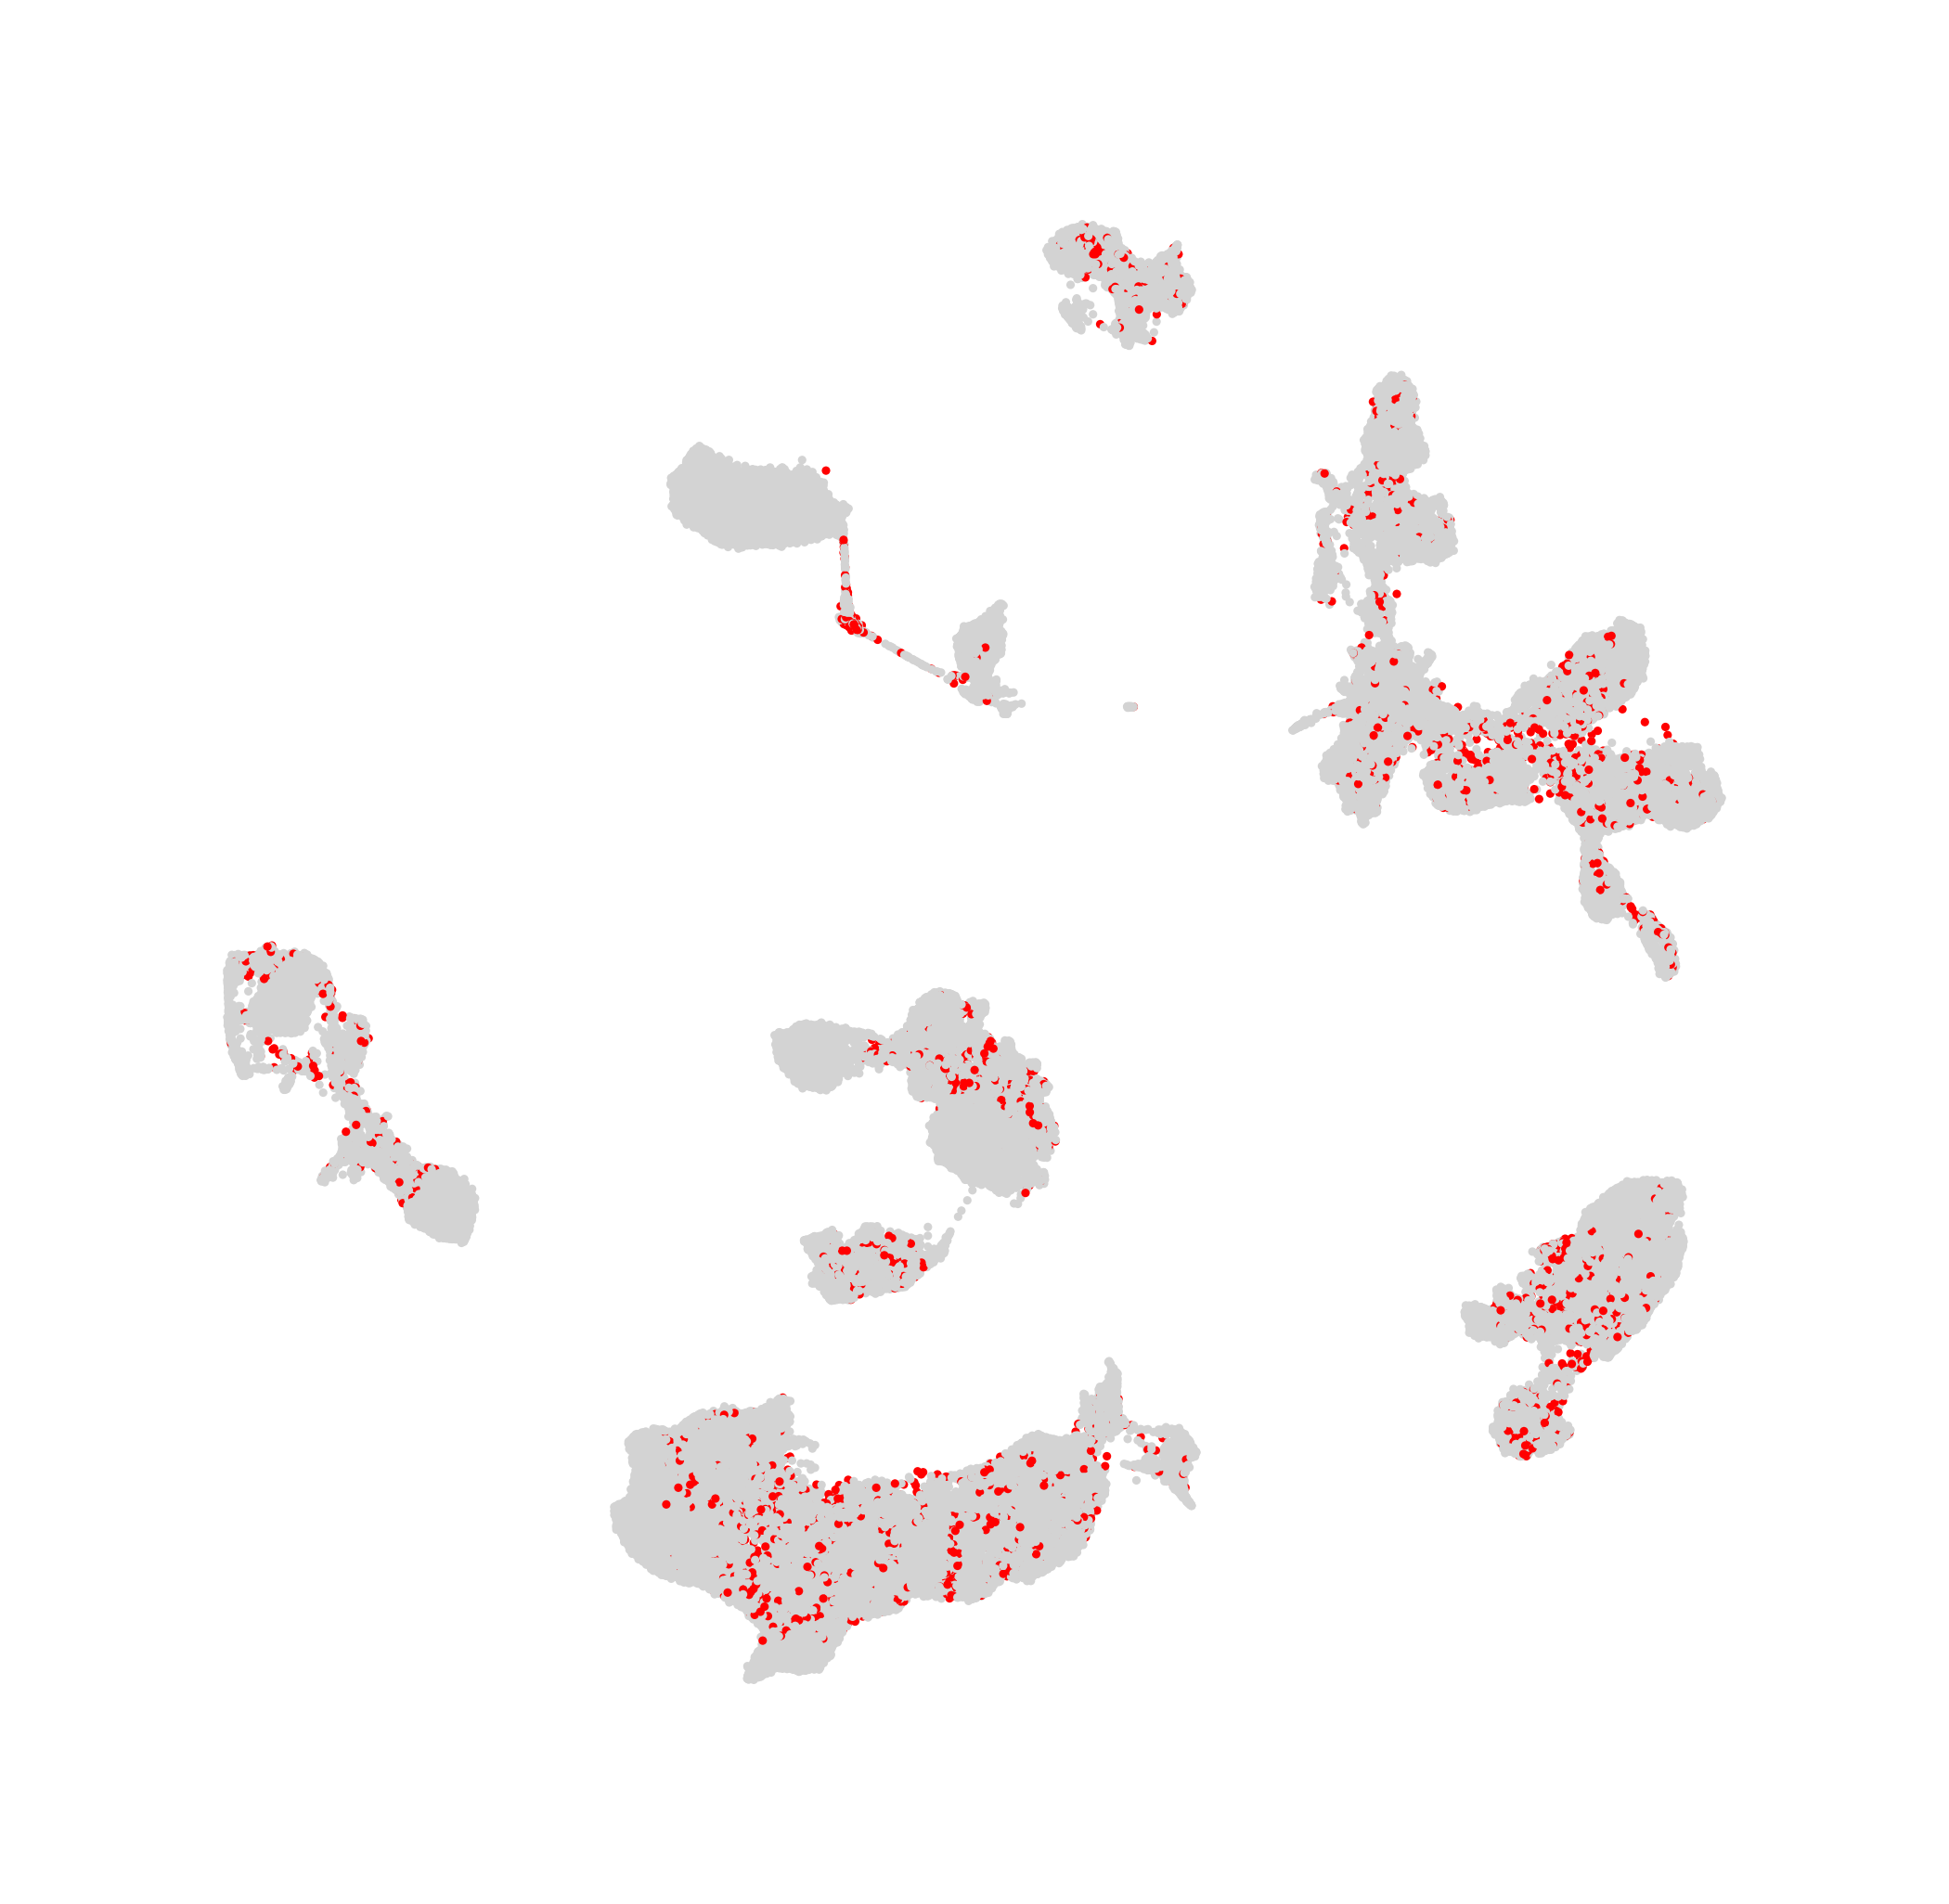

In [5]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=1200)

categorical_scatter(ax=ax,
                    data=prediction_result,
                    coord_base='l1-umap',
                    hue='type',
                    max_points=None,
                    axis_format=None,
                    s=0.3,
                    palette={
                        True: 'lightgray',
                        False: 'red'
                    })


# add_ax_box(ax, linewidth=0.5)

fig.savefig(f'L1-UMAP_color_by_sub_type_correct.scatter_part.png')

pass

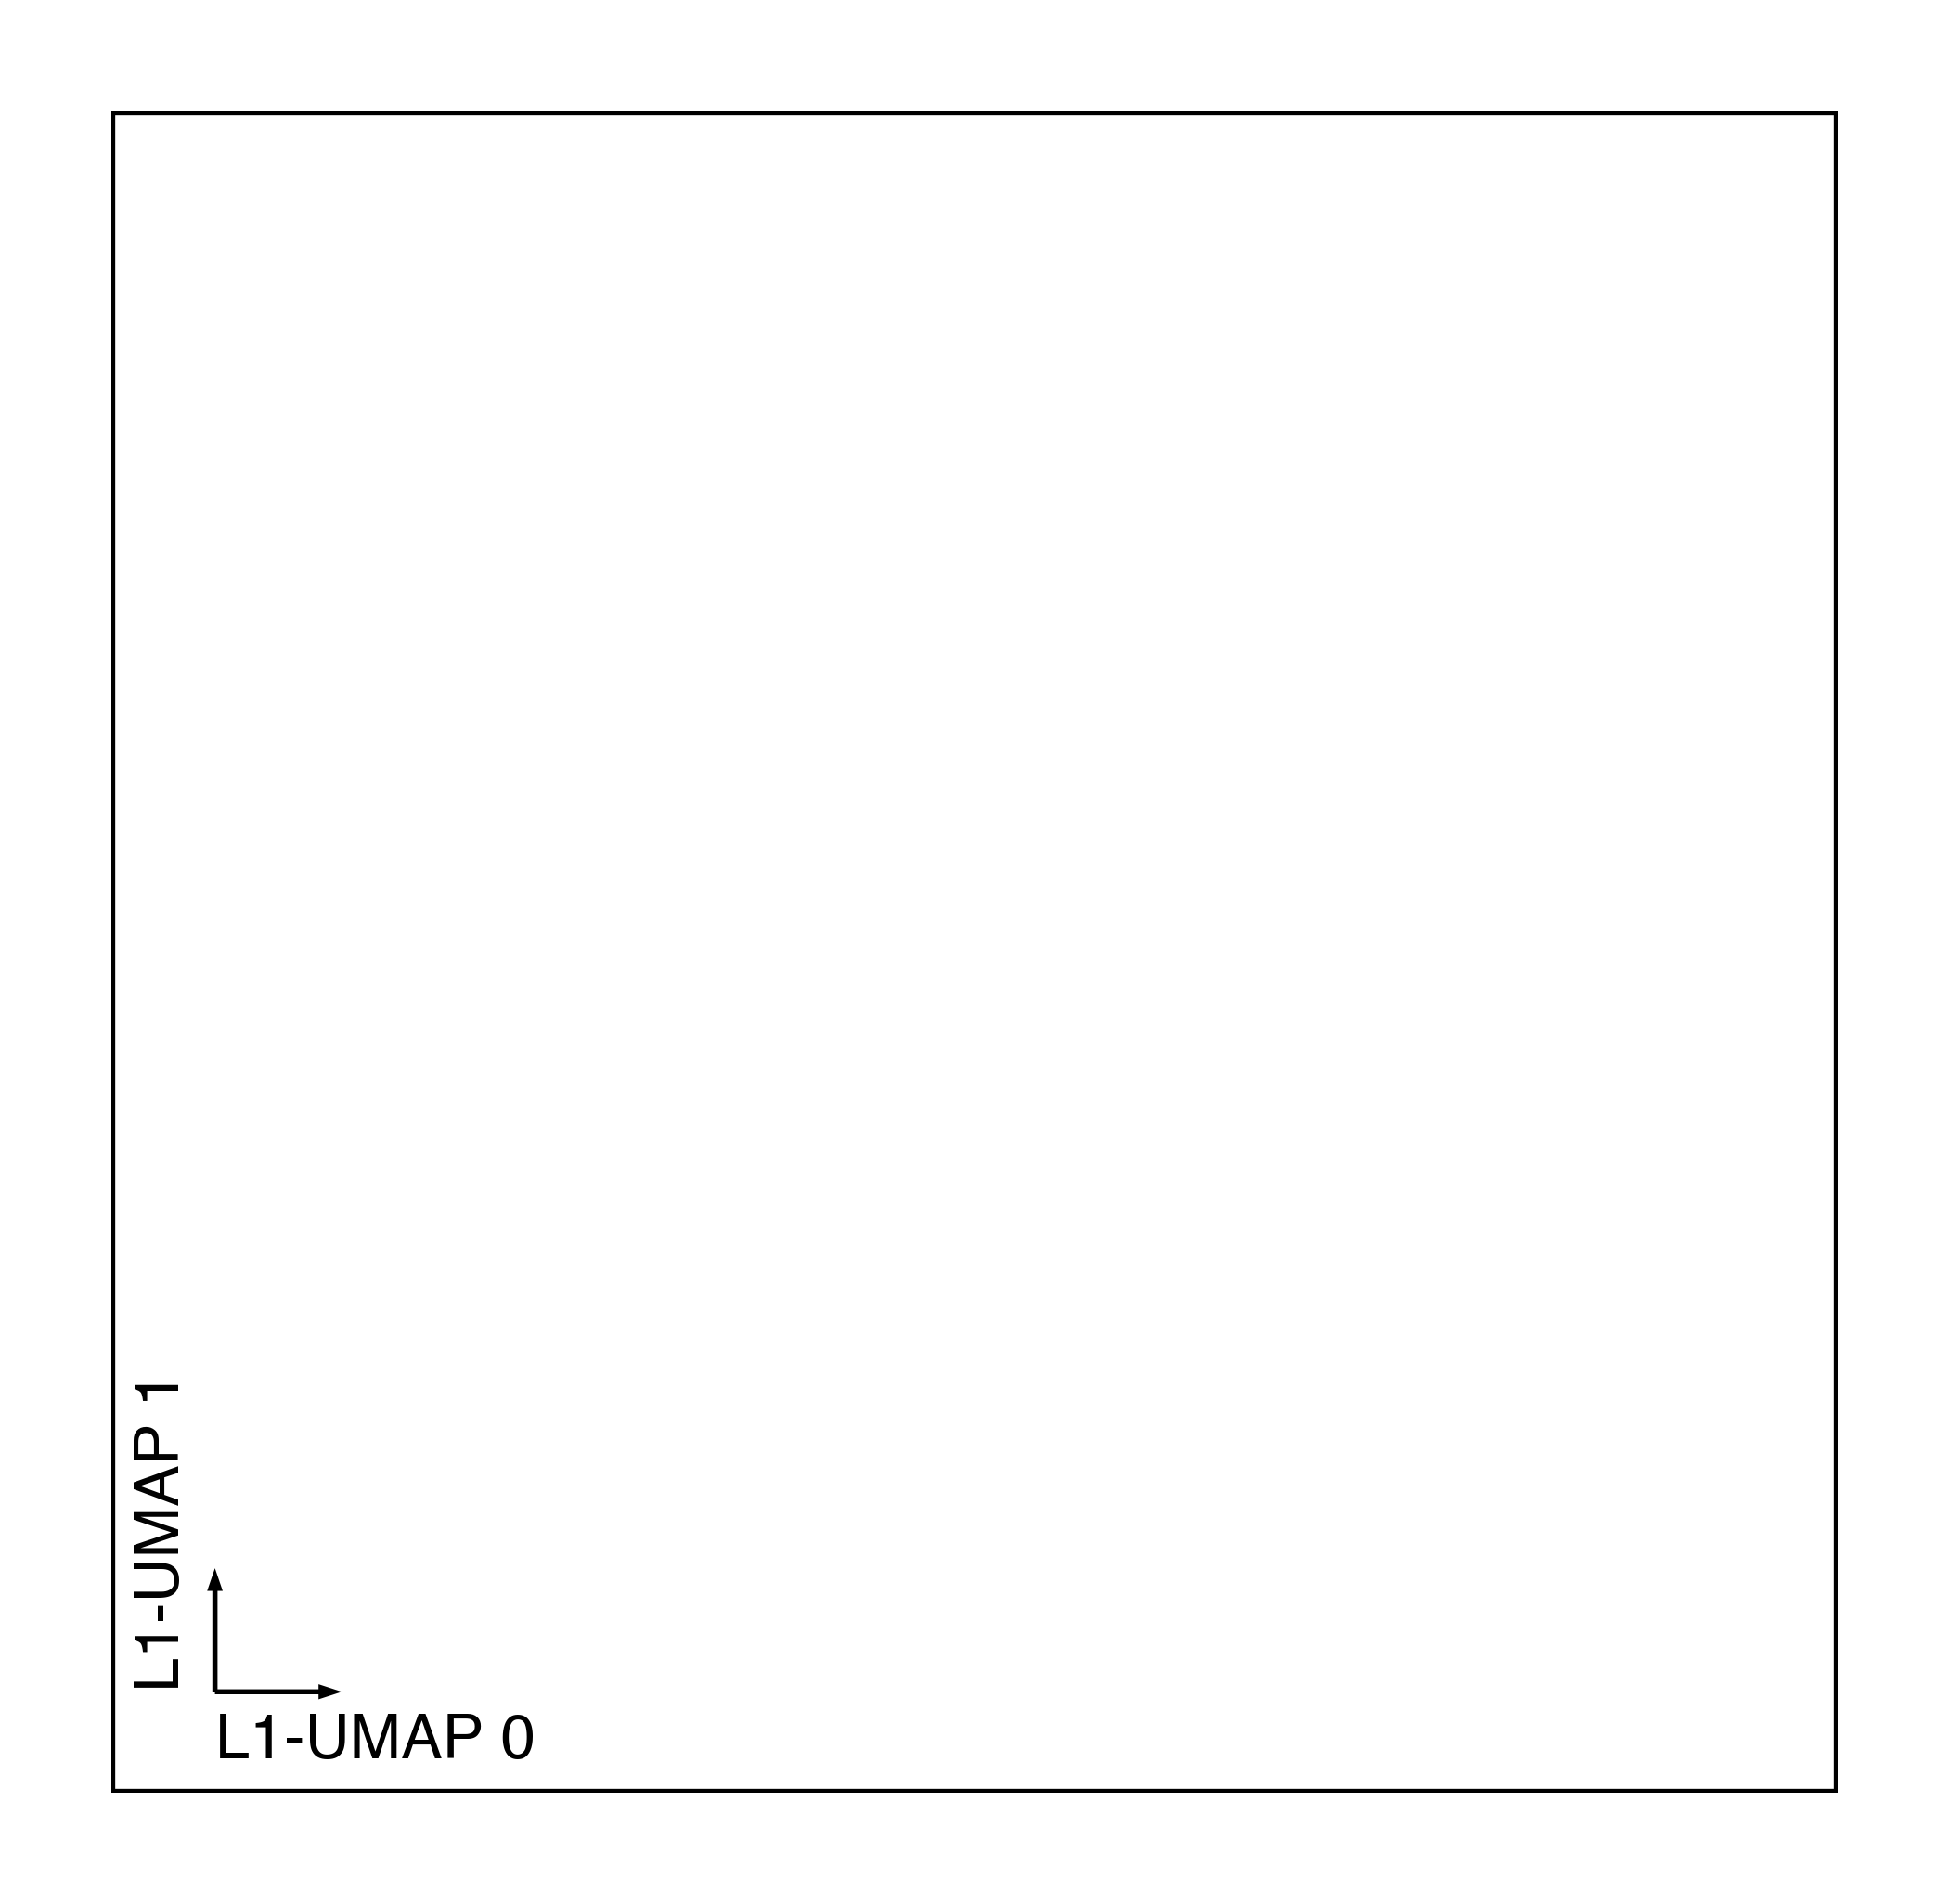

In [6]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=1200)


categorical_scatter(ax=ax,
                    data=prediction_result,
                    coord_base='l1-umap',
                    hue='type',
                    max_points=None,
                    s=0.1,
                    palette={
                        True: 'lightgray',
                        False: 'red'
                    })

add_ax_box(ax, linewidth=0.5)
ax.collections[0].remove()
fig.savefig(f'L1-UMAP_color_by_sub_type_correct.label_part.pdf')

pass